# **Title of Project**

<h1><font color="cyan">Bank Customer Churn Model </font></h1>

-------------

## **Objective**

<h4><font color="teal">The objective of the "Bank Customer Churn Model" project is to predict whether a customer is likely to leave the bank (churn) based on their behavioral, demographic, and transactional data. This helps the bank proactively identify at-risk customers and implement retention strategies to improve customer satisfaction and loyalty. </br>

## **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

## **Import Data**

In [ ]:
data = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

## **Describe Data**

In [ ]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
Num Of Products,0
Has Credit Card,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(10000, 13)

In [13]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [14]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [15]:
data.replace({'Geography':{'France':0,'Spain':1,'Germany':2}},inplace=True)

<ipython-input-15-f920e3407f79>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Geography':{'France':0,'Spain':1,'Germany':2}},inplace=True)


In [16]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [17]:
data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

<ipython-input-17-d3f429de4a90>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)


In [19]:
data['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [20]:
data.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [22]:
data['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [21]:
data.replace({'Has Credit Card':{'No':0,'Yes':1}},inplace=True)

In [23]:
data['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [24]:
data.sample(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
3967,15786643,Tsao,602,0,1,32,10,0.0,1,1,1,116052.92,0


In [27]:
data.loc[(data['Balance']== 0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [28]:
data['zero_balance'] = np.where(data['Balance'] == 0, 1, 0)

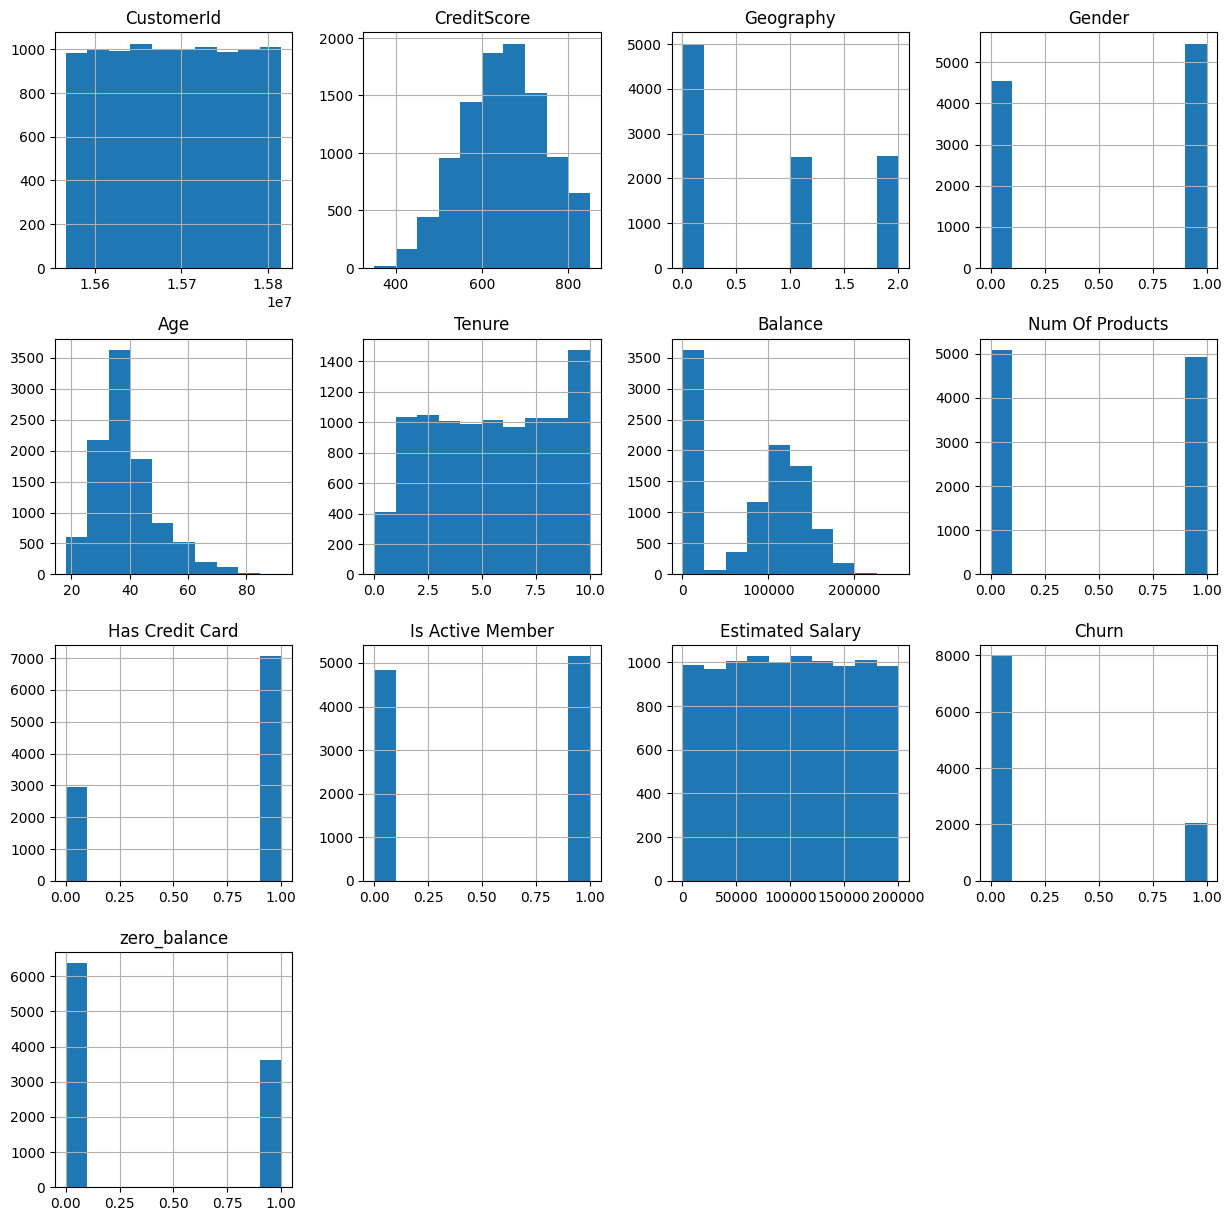

In [29]:
data.hist(figsize=(15,15))
plt.show()

In [31]:
data.groupby(['Churn', 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                4204     4204         4204    4204  4204    4204   
      1                2064     2064         2064    2064  2064    2064   
      2                1695     1695         1695    1695  1695    1695   
1     0                 810      810          810     810   810     810   
      1                 413      413          413     413   413     413   
      2                 814      814          814     814   814     814   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             4204             4204             4204              4204   
      1             2064             2064             2064              2064   
      2             1695             1695             1695              1695   
1     0              810              810              810               810   
      1              413              413              413               413   
      2              814              814              814               814   

                 Estimated Salary  zero_balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      2064          2064  
      2                      1695          1695  
1     0                       810           810  
      1                       413           413  
      2                       814           814

In [43]:
data= data.drop(['CustomerId', 'Surname'], axis=1)

In [44]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [45]:
X.shape

(10000, 11)

In [46]:
y.shape

(10000,)

## **Data Preprocessing**

In [47]:
data['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

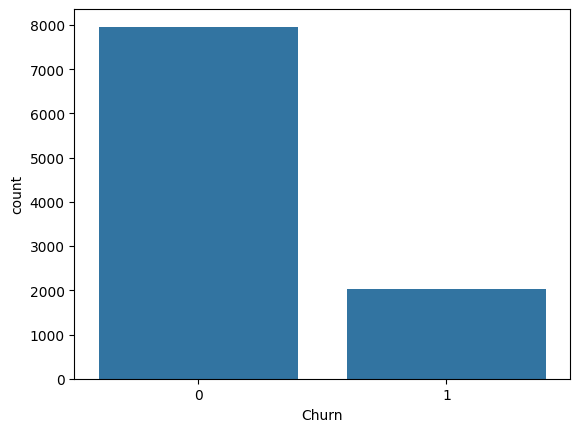

In [48]:
sns.countplot(x=data['Churn'])

In [50]:
X.shape

(10000, 11)

In [52]:
#scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32622142, -0.9025865 , -1.09598752, ...,  0.97024255,
         0.02188649,  1.32842845],
       [-0.44003595,  0.301665  , -1.09598752, ...,  0.97024255,
         0.21653375, -0.75276918],
       [-1.53679418, -0.9025865 , -1.09598752, ..., -1.03067011,
         0.2406869 , -0.75276918],
       ...,
       [ 0.60498839, -0.9025865 , -1.09598752, ...,  0.97024255,
        -1.00864308,  1.32842845],
       [ 1.25683526,  1.50591651,  0.91241915, ..., -1.03067011,
        -0.12523071, -0.75276918],
       [ 1.46377078, -0.9025865 , -1.09598752, ..., -1.03067011,
        -1.07636976, -0.75276918]])

## **Train Test Split**

In [53]:
from sklearn.model_selection import train_test_split

## **Modeling**

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [55]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [56]:
y_pred = svc.predict(x_test)

## **Model Evaluation**

In [57]:
confusion_matrix(y_test, y_pred)

array([[2383,   31],
       [ 423,  163]])

In [58]:
accuracy = svc.score(x_test, y_test)
accuracy

0.8486666666666667

## **Prediction**

In [71]:
new_sample = [X[2]]  # Reshape to 2D array
prediction = svc.predict(new_sample)
print(f"Prediction for the new sample {new_sample}: {prediction}")

Prediction for the new sample [array([-1.53679418, -0.9025865 , -1.09598752,  0.29351742,  1.03290776,
        1.33305335,  1.01694352,  0.64609167, -1.03067011,  0.2406869 ,
       -0.75276918])]: [0]


## **Explaination**

### Bank Customer Churn Prediction Project  
---

**Process:**  
1. **Data Collection:**  

2. **Data Preprocessing:**  
3. **Feature Engineering:**   

4. **Modeling:**  
   - Built a classification model using machine learning algorithms.  
   - Trained the model with 80% of the dataset and tested it on the remaining 20%.  

5. **Model Performance:**  
   - Achieved an accuracy of **84%** on the test dataset, meaning the model correctly predicted customer churn in 84% of cases.  

---

**Tools and Techniques Used:**  
- **Programming Language:** Python  
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn  
- **Algorithm:** Support Vector Machine (SVM)
- **Evaluation Metric:** Accuracy  

---

**Outcome:**  
With an accuracy of 84%, the model provides reliable predictions that can help banks identify at-risk customers and implement retention strategies, ultimately improving customer loyalty and reducing churn rates.  

